<a href="https://colab.research.google.com/github/LiorYariv1/CausalInference/blob/main/CI_data_exploration_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_hour = pd.read_csv("hour.csv")
df_hour['rainy'] = (df_hour['weathersit']>2)*1

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,rainy
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.081823
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.274103
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


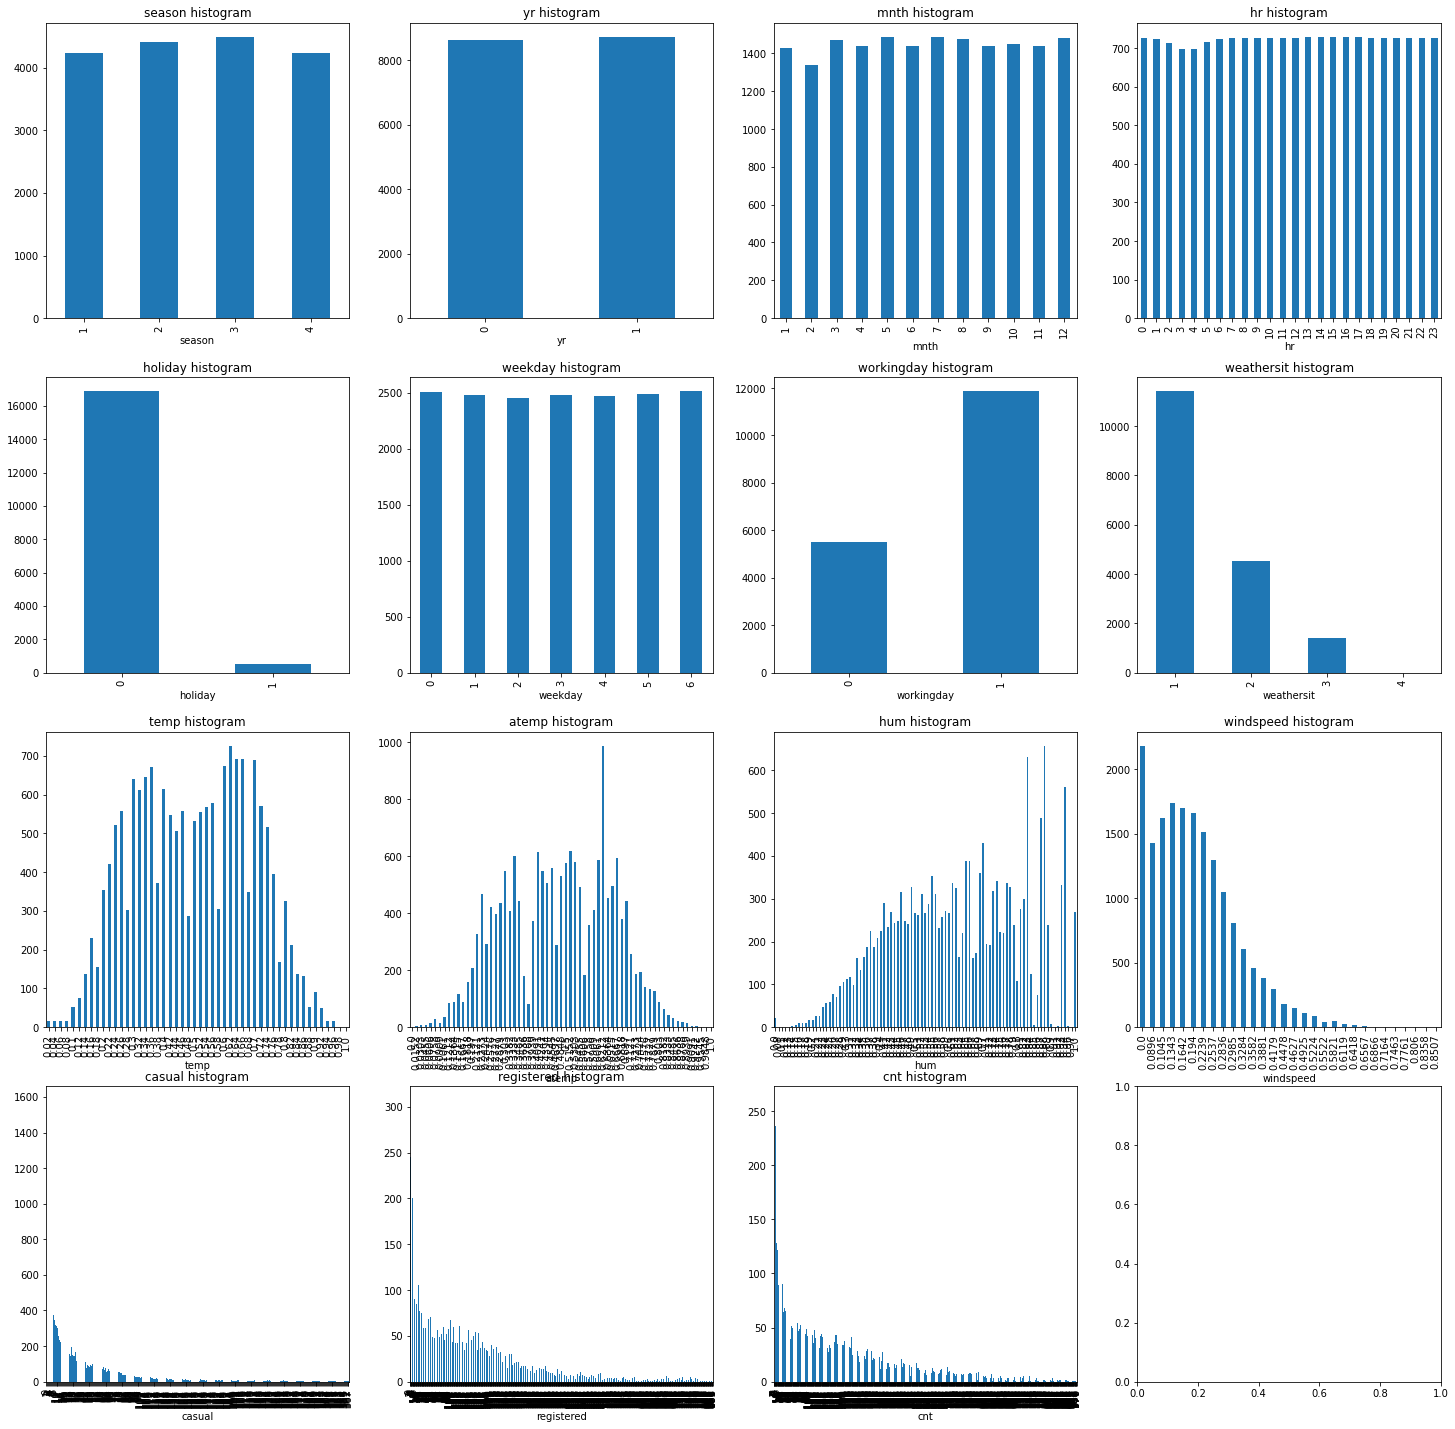

In [ ]:
columns = df_hour.columns[2:]
fig,axes = plt.subplots(4,4,figsize=(25,25))
axes = axes.ravel()
for i in range(15):
  col = columns[i]
  df_hour[[col,'instant']].groupby(by=col).count().plot(kind='bar',ax=axes[i],legend=False)
  axes[i].set_title(f'{col} histogram')

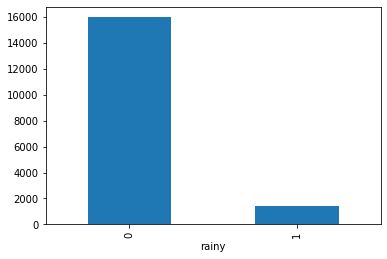

In [ ]:
df_hour[['rainy','instant']].groupby(by='rainy').count().plot(kind='bar',legend=False)

([<matplotlib.axis.XTick at 0x7fb2b48a1350>,
 [Text(0, 0, 'Winter'),
  Text(0, 0, 'Spring'),
  Text(0, 0, 'Summer'),
  Text(0, 0, 'Fall')])

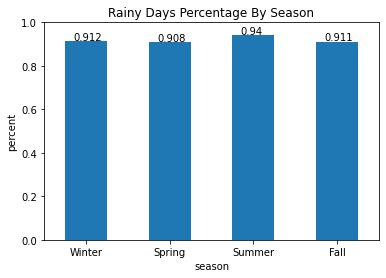

In [ ]:
ax=(1-df_hour[['season','rainy']].groupby(by='season').mean()).plot(kind='bar',rot=0,legend=False)
plt.ylim([0, 1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x()+0.1, p.get_height() * 1.005))
plt.title('Rainy Days Percentage By Season')
plt.ylabel('percent')
plt.xticks(range(4),['Winter','Spring','Summer','Fall'])
#  1:winter, 2:spring, 3:summer, 4:fall

([<matplotlib.axis.XTick at 0x7fb2b2d50250>,
 [Text(0, 0, 'Winter'),
  Text(0, 0, 'Spring'),
  Text(0, 0, 'Summer'),
  Text(0, 0, 'Fall')])

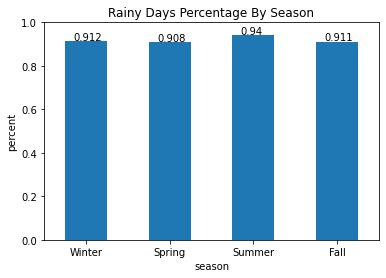

In [ ]:
ax=(1-df_hour[['season','rainy']].groupby(by='season').mean()).plot(kind='bar',rot=0,legend=False)
plt.ylim([0, 1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x()+0.1, p.get_height() * 1.005))
plt.title('Rainy Days Percentage By Season')
plt.ylabel('percent')
plt.xticks(range(4),['Winter','Spring','Summer','Fall'])
#  1:winter, 2:spring, 3:summer, 4:fall

In [ ]:
cols = df_hour.columns
cols = [x for x in cols if x not in ['instant','weathersit']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


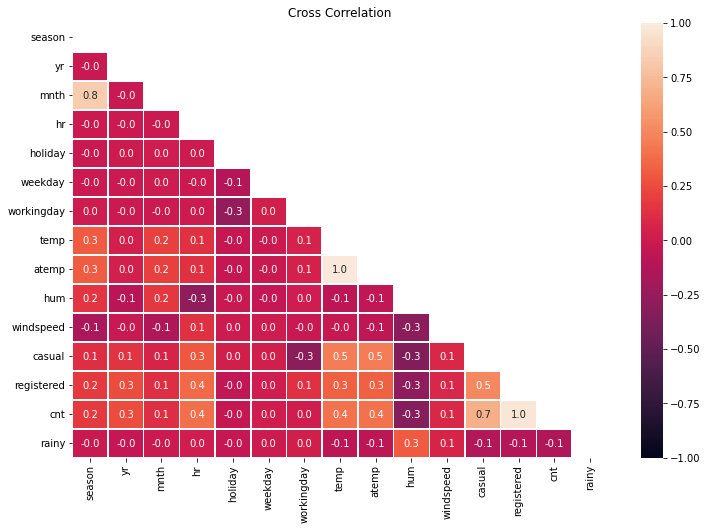

In [ ]:
# correlation
# cross correlation between our features, the treatment and the effect
# plot as matplotlib heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(figsize=(12, 8))
corr = df_hour[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, linewidths=.5, fmt='.1f')
ax.title.set_text('Cross Correlation')
plt.show()

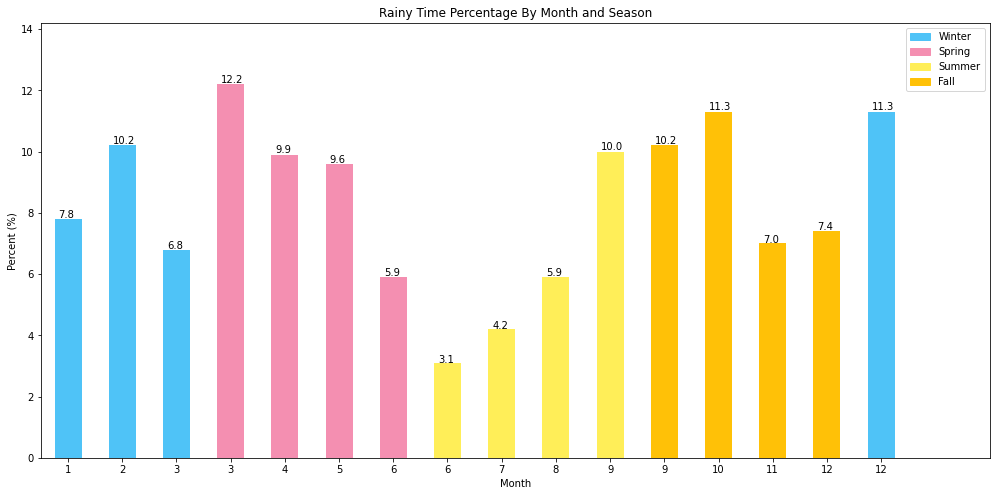

In [ ]:
winter = '#4FC3F7'
spring = '#F48FB1'
summer = '#FFEE58'
fall = '#FFC107'
colors = [winter,winter,winter,spring,spring,spring,spring,summer,summer,summer,summer,fall,fall,fall,fall,winter]


df_hour['new_season'] = df_hour.apply(lambda x: 5 if x.season==1 and x.mnth==12 else x.season, axis=1)
ax=(round(100*df_hour[['new_season','rainy','mnth']].groupby(by=['mnth','new_season']).mean(),1))['rainy'].plot(kind='bar',rot=0,legend=False,figsize=(17,8),color=colors)
plt.ylim([0, 14.2])
plt.xlim([-0.5, 17])

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x()+0.075, p.get_height() * 1.005))
plt.title('Rainy Time Percentage By Month and Season')
plt.ylabel('Percent (%)')
plt.xlabel('Month')
ticks_list = [1,2,3,3,4,5,6,6,7,8,9,9,10,11,12,12]
plt.xticks(range(len(ticks_list)),ticks_list)
plt.legend(['winter','sprint','summer','fall'])

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

winter_patch = mpatches.Patch(color=winter, label='Winter')
spring_patch = mpatches.Patch(color=spring, label='Spring')
summer_patch = mpatches.Patch(color=summer, label='Summer')
fall_patch = mpatches.Patch(color=fall, label='Fall')

plt.legend(handles=[winter_patch,spring_patch,summer_patch,fall_patch])
plt.show()

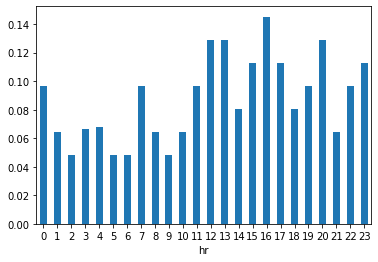

In [ ]:
df_hour[df_hour.mnth==12][['hr','rainy','dteday']].groupby(by='hr').mean().plot(kind='bar',rot=0,legend=False)

In [ ]:
workd = df_hour[df_hour.workingday==1]
holid = df_hour[df_hour.workingday==0]

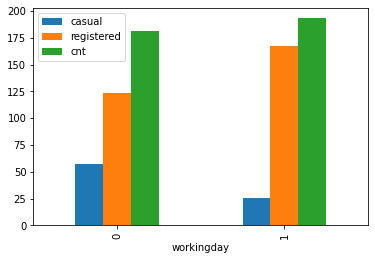

In [ ]:
df_hour.groupby(by='workingday')[['casual','registered','cnt']].mean().plot(kind='bar')

In [ ]:
import numpy as np
tmp=df_hour.groupby(by=['workingday','rainy']).agg({'casual':['mean',np.std],'registered':['mean',np.std],'cnt':['mean',np.std]}).reset_index()
tmp

workingday rainy     casual             registered                     cnt  \
                         mean        std        mean         std        mean   
0          0     0  59.539930  72.719867  127.293144  108.897110  186.833074   
1          0     1  29.089474  48.178783   78.984211   78.669039  108.073684   
2          1     0  26.937818  29.665933  174.016077  168.066688  200.953894   
3          1     1  11.263916  17.257067  101.486564  124.769345  112.750480   

               
          std  
0  174.840110  
1  121.709047  
2  187.225595  
3  137.824852

In [ ]:
tmp=df_hour.groupby(by=['workingday','rainy'])['casual','registered','cnt'].std().reset_index()
tmp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,workingday,rainy,casual,registered,cnt
0,0,0,72.719867,108.897110,174.840110
1,0,1,48.178783,78.669039,121.709047
2,1,0,29.665933,168.066688,187.225595
3,1,1,17.257067,124.769345,137.824852


ValueError: ignored

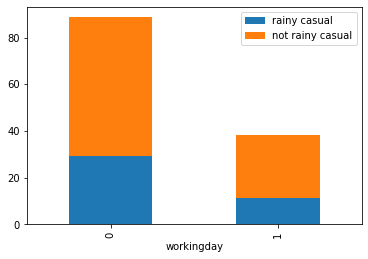

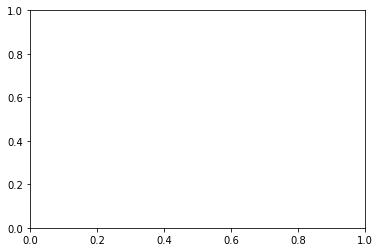

In [ ]:
ax=tmp2[['workingday','rainy casual','not rainy casual']].plot(kind='bar',stacked=True,x='workingday')
tmp2[['workingday','rainy reg','not rainy reg']].plot(kind='bar',stacked=True,x='workingday',axes=ax)

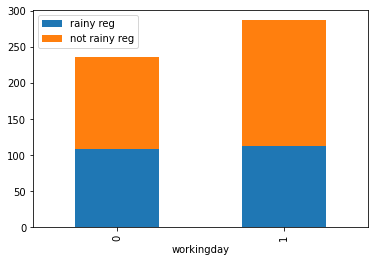

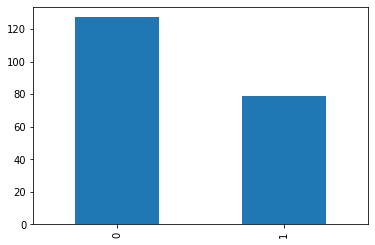

In [ ]:
tmp[tmp.workingday==0]['registered'].plot(kind='bar',stacked=True)

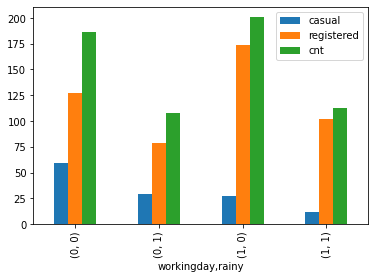

In [ ]:
df_hour.groupby(by=['workingday','rainy'])[['casual','registered','cnt']].mean().plot(kind='bar')

In [ ]:
holid = df_hour[df_hour.workingday==0]
tmp = holid[(holid.mnth==12)&(holid.hr<=16)&(holid.hr>=12)][['hr','rainy','dteday']].groupby(by=['dteday']).sum()
tmp[tmp.rainy>0]

,hr,rainy
dteday,,
2012-12-09,70,2
2012-12-29,70,2


In [ ]:
# holid = df_hour[df_hour.workingday==0]
tmp = df_hour[(df_hour.mnth==12)&(df_hour.hr<=16)&(df_hour.hr>=12)][['hr','rainy','dteday']].groupby(by=['dteday']).sum()
tmp[tmp.rainy>2]

,hr,rainy
dteday,,
2011-12-06,70,5
2011-12-07,70,5
2011-12-21,70,3
2011-12-27,70,5
2012-12-24,70,4
2012-12-26,70,5


In [ ]:
holid[holid.mnth==12].dteday.unique()

array(['2011-12-03', '2011-12-04', '2011-12-10', '2011-12-11',
       '2011-12-17', '2011-12-18', '2011-12-24', '2011-12-25',
       '2011-12-26', '2011-12-31', '2012-12-01', '2012-12-02',
       '2012-12-08', '2012-12-09', '2012-12-15', '2012-12-16',
       '2012-12-22', '2012-12-23', '2012-12-25', '2012-12-29',
       '2012-12-30'], dtype=object)

In [ ]:
colors

['#4FC3F7',
 '#4FC3F7',
 '#4FC3F7',
 '#F48FB1',
 '#F48FB1',
 '#F48FB1',
 '#F48FB1',
 '#FFEE58',
 '#FFEE58',
 '#FFEE58',
 '#FFEE58',
 '#FFC107',
 '#FFC107',
 '#FFC107',
 '#FFC107',
 '#4FC3F7']

In [ ]:
(1-df_hour[['season','rainy','mnth']].groupby(by=['mnth','season']).mean())

rainy
mnth season          
1    1       0.922323
2    1       0.897837
3    1       0.931507
     2       0.877863
4    2       0.901183
5    2       0.903898
6    2       0.940625
     3       0.968750
7    3       0.958333
8    3       0.941017
9    3       0.900285
     4       0.898438
10   4       0.886975
11   4       0.929715
12   1       0.887189
     4       0.926042

In [ ]:
1-df_hour[['season','rainy']].groupby(by='season').mean()

,rainy
season,
1,0.912306
2,0.907916
3,0.940169
4,0.911389


In [ ]:
df_hour[['season','instant']].groupby(by=col).count().plot(kind='bar',ax=axes[i],legend=False)

KeyError: ignored

In [ ]:
workd = df_hour[df_hour.workingday==1]
holid = df_hour[df_hour.workingday==0]

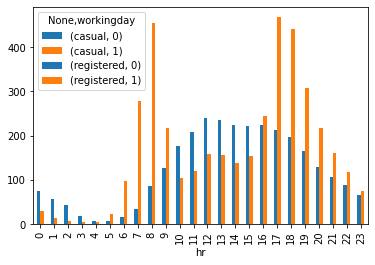

In [ ]:
ax = df_hour[['hr','workingday','casual']].groupby(['hr', 'workingday']).agg('mean').unstack().plot(kind = 'bar', legend=True)
df_hour[['hr','workingday','registered']].groupby(['hr', 'workingday']).agg('mean').unstack().plot(kind = 'bar', legend=True, ax=ax)
# plt.legend(['holiday','workday'])

Text(0.5, 1.0, 'Mean Casual Users by Hour')

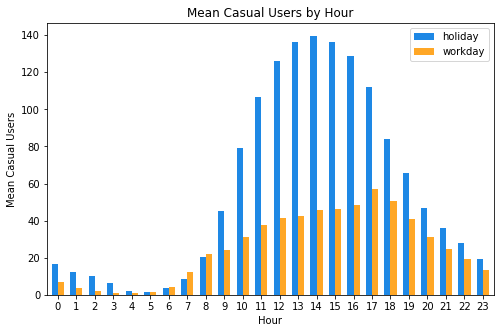

In [ ]:
df_hour[['hr','workingday','casual']].\
groupby(['hr', 'workingday']).agg('mean').unstack().\
plot(kind = 'bar', legend=True, color=['#1E88E5','#FFA726'], figsize=(8,5), rot=0, width=0.66)

plt.legend(['holiday','workday'])
plt.ylabel('Mean Casual Users')
plt.xlabel('Hour')
plt.title('Mean Casual Users by Hour')

Text(0.5, 1.0, 'Mean Registered Users by Hour')

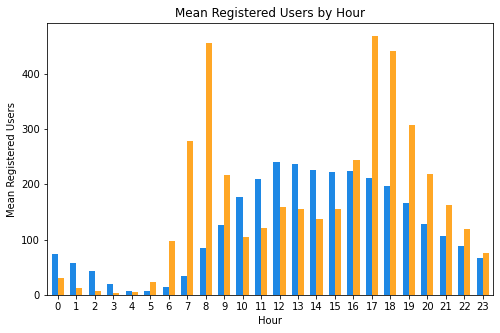

In [ ]:
df_hour[['hr','workingday','registered']].\
groupby(['hr', 'workingday']).agg('mean').unstack().\
plot(kind = 'bar', legend=False, color=['#1E88E5','#FFA726'], figsize=(8,5), rot=0, width=0.66)
# plt.legend(['holiday','workday'])
plt.ylabel('Mean Registered Users')
plt.xlabel('Hour')
plt.title('Mean Registered Users by Hour')

In [ ]:
fig,axes = plt.subplots(2,1, figsize=(8,5))
df_hour[['hr','workingday','casual']].groupby(['hr', 'workingday']).agg('mean').unstack().plot(kind = 'bar', legend=False, ax=axes[0])
df_hour[['hr','workingday','registered']].groupby(['hr', 'workingday']).agg('mean').unstack().plot(kind = 'bar', legend=False, ax=axes[1])
axes[0].legend(['holiday','workday'])
axes[0].ylabel('Mean Casual Users')
axes[1].ylabel('Mean Registered Users')

In [ ]:
# ax = df_hour[['hr','workingday','casual']].groupby(['hr', 'workingday']).agg('mean').unstack().plot(kind = 'bar', legend=True)
df_hour[['hr','workingday','registered']].groupby(['hr', 'workingday']).agg('mean').unstack().plot(kind = 'bar', legend=True)
plt.legend(['holiday','workday'])

In [ ]:
workd.groupby(by='hr').mean()[['cnt']].plot.bar(rot=0)

In [ ]:
workd.groupby(by='hr').mean()[['casual', 'registered']].plot.bar(rot=0)

In [ ]:
workd['rainy'] = (workd['weathersit']>2)*1
holid['rainy'] = (holid['weathersit']>2)*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


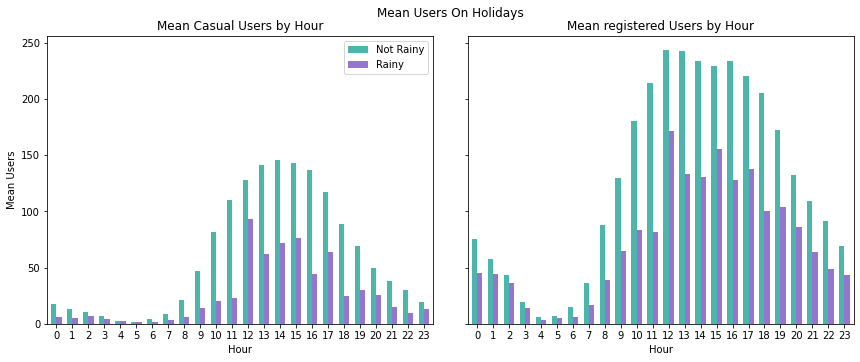

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,5),sharey=True)
# holid[['hr','rainy','casual']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=False, color=['lightcoral','indianred'],ax=axes[0])
holid[['hr','rainy','casual']].groupby(['hr', 'rainy']).agg('mean').unstack().\
plot(kind = 'bar', legend=False, color=['#4DB6AC','#9575CD'],ax=axes[0], width=0.66, rot=0)
# plt.legend(['Not Rainy','Rainy'])
axes[0].set_ylabel('Mean Users')
axes[0].set_xlabel('Hour')
axes[0].set_title('Mean Casual Users by Hour')
# holid[['hr','rainy','registered']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=False, color=['lightcoral','indianred'],ax=axes[1])
holid[['hr','rainy','registered']].groupby(['hr', 'rainy']).agg('mean').unstack().\
plot(kind = 'bar', legend=False, color=['#4DB6AC','#9575CD'],ax=axes[1], width=0.66, rot=0)
axes[1].set_xlabel('Hour')
axes[1].set_title('Mean registered Users by Hour')
axes[0].legend(['Not Rainy','Rainy'])
plt.suptitle('Mean Users On Holidays')
# plt.subplot_tool()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.09, 
                    hspace=0.09)

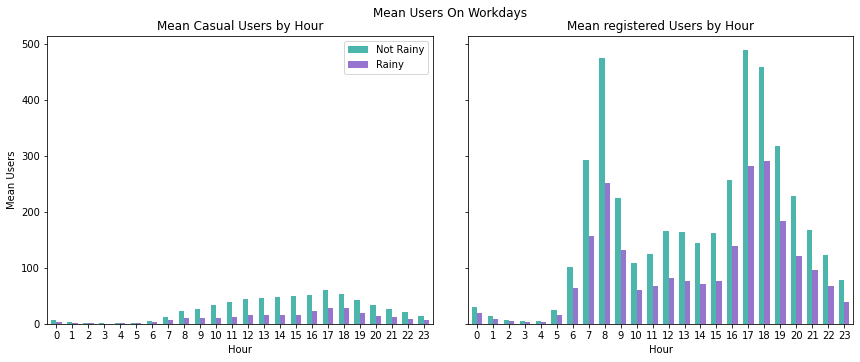

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(14,5),sharey=True)
# workd[['hr','rainy','casual']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=False, color=['lightcoral','indianred'],ax=axes[0])
workd[['hr','rainy','casual']].groupby(['hr', 'rainy']).agg('mean').unstack().\
plot(kind = 'bar', legend=False, color=['#4DB6AC','#9575CD'], ax=axes[0], width=0.66, rot=0)
# plt.legend(['Not Rainy','Rainy'])
axes[0].set_ylabel('Mean Users')
axes[0].set_xlabel('Hour')
axes[0].set_title('Mean Casual Users by Hour')
# workd[['hr','rainy','registered']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=False, color=['lightcoral','indianred'],ax=axes[1])
workd[['hr','rainy','registered']].groupby(['hr', 'rainy']).agg('mean').unstack().\
plot(kind = 'bar', legend=False, color=['#4DB6AC','#9575CD'], ax=axes[1], width=0.66, rot=0)
axes[1].set_xlabel('Hour')
axes[1].set_title('Mean registered Users by Hour')
axes[0].legend(['Not Rainy','Rainy'])
plt.suptitle('Mean Users On Workdays')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.09, 
                    hspace=0.09)

Text(0.5, 1.0, 'Mean registered Users by Hour')

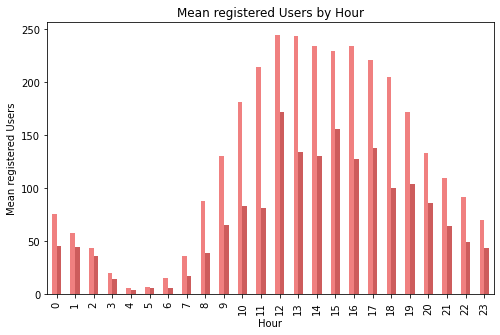

In [ ]:
holid[['hr','rainy','registered']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=False, color=['lightcoral','indianred'], figsize=(8,5))
# plt.legend(['Not Rainy','Rainy'])
plt.ylabel('Mean registered Users')
plt.xlabel('Hour')
plt.title('Mean registered Users by Hour')

Text(0.5, 1.0, 'Mean Casual Users by Hour')

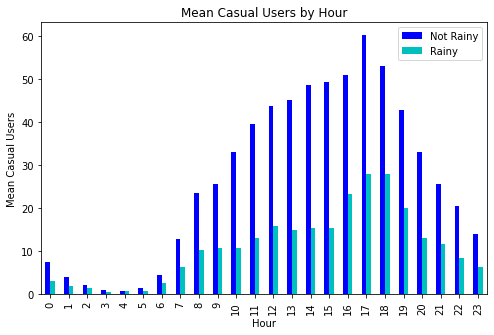

In [ ]:
workd[['hr','rainy','casual']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=True, color=['b','c'], figsize=(8,5))
plt.legend(['Not Rainy','Rainy'])
plt.ylabel('Mean Casual Users')
plt.xlabel('Hour')
plt.title('Mean Casual Users by Hour')

Text(0.5, 1.0, 'Mean registered Users by Hour')

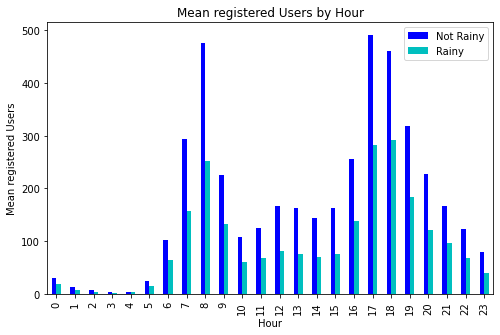

In [ ]:
workd[['hr','rainy','registered']].groupby(['hr', 'rainy']).agg('mean').unstack().plot(kind = 'bar', legend=True, color=['b','c'], figsize=(8,5))
plt.legend(['Not Rainy','Rainy'])
plt.ylabel('Mean registered Users')
plt.xlabel('Hour')
plt.title('Mean registered Users by Hour')

In [ ]:
rainy_days_workd = workd[(workd.hr>=7)&(workd.hr<=9)].groupby(by='dteday').mean()
semi_rainy_days_workd= rainy_days_workd[(rainy_days_workd.rainy>0)&(rainy_days_workd.rainy<1)]
rainy_days_holid = holid[(holid.hr>=12)&(holid.hr<=16)].groupby(by='dteday').mean()
semi_rainy_days_holid= rainy_days_holid[(rainy_days_holid.rainy>0)&(rainy_days_holid.rainy<1)]

In [ ]:
tmp = holid[(holid.dteday.isin(semi_rainy_days_holid.index)) & ((holid.hr>=12)&(holid.hr<=16))][['dteday','hr','rainy','weathersit','cnt']]

In [ ]:
grouped = tmp.groupby(by='dteday')

def wavg(group):
    # print(group)
    id = group['rainy'].idxmax()
    # print(id)
    # print(group['hr'][id])
    return group['hr'][id], group['rainy'].sum()

first_rain =grouped.apply(wavg)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

first_rain['hr'] = first_rain[0].apply(lambda x: x[0])
first_rain['total'] = first_rain[0].apply(lambda x: x[1])
areas = first_rain.groupby(by=['hr','total']).count().reset_index()
areas[0]*=30
plt.scatter(x=areas.hr, y=areas.total, s=areas[0], alpha=0.5)

In [ ]:
holid_filtered_q2 = holid[(holid.hr>=12)&(holid.hr<=16)].groupby(by='dteday').agg({'rainy':'sum','mnth':'mean','season':'mean','casual':'sum','registered':'sum','cnt':'sum'})
holid_filtered_q2=holid_filtered_q2[(holid_filtered_q2.rainy==0)|(holid_filtered_q2.rainy>2)]

In [ ]:
holid_filtered_q2['rainy'] = (holid_filtered_q2['rainy']>0)*1
holid_filtered_q2

In [ ]:
holid.groupby(by='hr').mean()[['cnt']].plot.bar(rot=0)

In [ ]:
holid.groupby(by='hr').mean()[['casual', 'registered']].plot.bar(rot=0)

In [ ]:
holid[((holid.hr>=12) & (holid.hr<=16))].weathersit.hist()


In [ ]:
holid[((holid.hr>=11) & (holid.hr<=18))].weathersit.hist()

In [ ]:
tmp = df_hour.groupby(by='hr').sum().reset_index()
tmp[['hr', 'cnt']].plot.bar(rot=0)

In [ ]:
df_day.weathersit.hist()

In [ ]:
df_hour[(df_hour.hr>6) & (df_hour.hr<22)].weathersit.hist()

In [ ]:
df_hour[(df_hour.hr>6) & (df_hour.hr<22)].hum.hist()

In [ ]:
df_hour[(df_hour.hr>6) & (df_hour.hr<22)].windspeed.hist()

In [ ]:
df_hour.head(35)

In [ ]:
workd8 = workd[(workd['hr']==8)]
workd178 = workd[(workd['hr']==17) | (workd['hr']==18)]

In [ ]:
tmp = workd178[['hr','rainy','dteday','registered', 'season',	'mnth']].groupby(by=['dteday']).sum()
print("Data of registered users on workingdays at 17-18:")
print("#rows", tmp.shape[0])
print("# with only 0 rain", tmp[tmp['rainy']==0].shape[0])
print("# with only 1 rain", tmp[tmp['rainy']==1].shape[0])
print("# with only 2 rain", tmp[tmp['rainy']==2].shape[0])
print("# with only 0 or 2 rain", tmp[tmp['rainy']!=1].shape[0])

print()
print("Data of registered users on workingdays at 8:")
print("#rows", workd8.shape[0])
print("# with 0 rain", workd8[workd8['rainy']==0].shape[0])
print("# with 1 rain", workd8[workd8['rainy']==1].shape[0])

Data of registered users on workingdays at 17-18:
#rows 499
# with only 0 rain 430
# with only 1 rain 34
# with only 2 rain 35
# with only 0 or 2 rain 465

Data of registered users on workingdays at 8:
#rows 496
# with 0 rain 451
# with 1 rain 45


In [ ]:
workd178_2 = workd178[['hr','rainy','dteday','registered', 'season',	'mnth']].groupby(by=['dteday']).mean()
workd178_2 = workd178_2[(workd178_2['rainy']==0) | (workd178_2['rainy']==1)]
# workd178_2

workd8_2 = workd8[['hr','rainy','dteday','registered', 'season',	'mnth']]

In [ ]:
q1df = workd8_2.append(workd178_2)
q1df

,hr,rainy,dteday,registered,season,mnth
53,8.0,0.0,2011-01-03,153.0,1.0,1.0
76,8.0,0.0,2011-01-04,177.0,1.0,1.0
99,8.0,0.0,2011-01-05,192.0,1.0,1.0
122,8.0,0.0,2011-01-06,216.0,1.0,1.0
145,8.0,0.0,2011-01-07,190.0,1.0,1.0
...,...,...,...,...,...,...
2012-12-24,17.5,1.0,NaN,19.5,1.0,12.0
2012-12-26,17.5,1.0,NaN,46.5,1.0,12.0
2012-12-27,17.5,0.0,NaN,207.5,1.0,12.0
2012-12-28,17.5,0.0,NaN,212.5,1.0,12.0


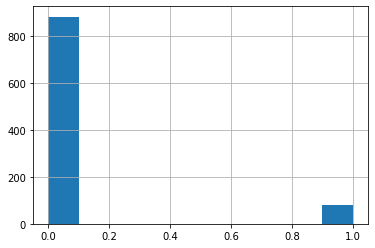

In [ ]:
q1df['rainy'].hist()

CALCULATE PROPENSITY 

In [ ]:
import statsmodels.api as sma
import statsmodels.formula.api as smf

def estimate_propensity(formula,data,show_summary=True):
  model = smf.glm(formula=formula,data=data, family=sma.families.Binomial()).fit()

  if show_summary:
    print(model.summary())
  return pd.Series(data=model.predict(data),index=data.index)

In [ ]:
propensity_model_covariates = ['mnth','season']
propensity_model_formula = 'rainy ~ '+" + ".join(propensity_model_covariates)
q1df['propensity'] = estimate_propensity(formula = propensity_model_formula, data =q1df)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  rainy   No. Observations:                  962
Model:                            GLM   Df Residuals:                      959
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.90
Date:                Wed, 07 Sep 2022   Deviance:                       553.80
Time:                        16:08:28   Pearson chi2:                     963.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1773      0.281     -7.753      0.0

In [ ]:
q1df

,hr,rainy,dteday,registered,season,mnth,propensity
53,8.0,0.0,2011-01-03,153.0,1.0,1.0,0.085746
76,8.0,0.0,2011-01-04,177.0,1.0,1.0,0.085746
99,8.0,0.0,2011-01-05,192.0,1.0,1.0,0.085746
122,8.0,0.0,2011-01-06,216.0,1.0,1.0,0.085746
145,8.0,0.0,2011-01-07,190.0,1.0,1.0,0.085746
...,...,...,...,...,...,...,...
2012-12-24,17.5,1.0,NaN,19.5,1.0,12.0,0.159420
2012-12-26,17.5,1.0,NaN,46.5,1.0,12.0,0.159420
2012-12-27,17.5,0.0,NaN,207.5,1.0,12.0,0.159420
2012-12-28,17.5,0.0,NaN,212.5,1.0,12.0,0.159420


common support

Text(0.5, 0, 'Propensity')

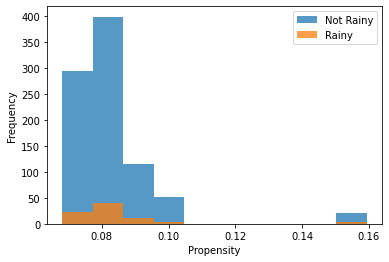

In [ ]:
from matplotlib.pyplot import *
q1df.groupby('rainy')['propensity'].plot(kind='hist',sharex=True,bins=10, alpha=0.75,legend=True)
legend(['Not Rainy', 'Rainy'])
xlabel('Propensity')

In [ ]:
import numpy as np
def trim_common_support(data, label_name):
  group_min_max = pd.DataFrame()
  group_min_max['min_propensity'] = q1df.groupby('rainy').propensity.min()
  group_min_max['max_propensity'] = q1df.groupby('rainy').propensity.max()

  # group_min_max = (data.groupby(label_name).propensity.agg({'min_propensity':np.min, 'max_propensity':np.max}))
  # print(group_min_max)###

  min_common_support = np.max(group_min_max.min_propensity)
  max_common_support = np.min(group_min_max.max_propensity)

  common_support = (data.propensity >= min_common_support) & (data.propensity <= max_common_support)
  control = (data[label_name] == 0)
  treated = (data[label_name] == 1)

  return data[common_support]


In [ ]:
final_q1df = trim_common_support(q1df, "rainy")

In [ ]:
final_q1df

,hr,rainy,dteday,registered,season,mnth,propensity
53,8.0,0.0,2011-01-03,153.0,1.0,1.0,0.085746
76,8.0,0.0,2011-01-04,177.0,1.0,1.0,0.085746
99,8.0,0.0,2011-01-05,192.0,1.0,1.0,0.085746
122,8.0,0.0,2011-01-06,216.0,1.0,1.0,0.085746
145,8.0,0.0,2011-01-07,190.0,1.0,1.0,0.085746
...,...,...,...,...,...,...,...
2012-12-24,17.5,1.0,NaN,19.5,1.0,12.0,0.159420
2012-12-26,17.5,1.0,NaN,46.5,1.0,12.0,0.159420
2012-12-27,17.5,0.0,NaN,207.5,1.0,12.0,0.159420
2012-12-28,17.5,0.0,NaN,212.5,1.0,12.0,0.159420


Text(0.5, 0, 'Propensity')

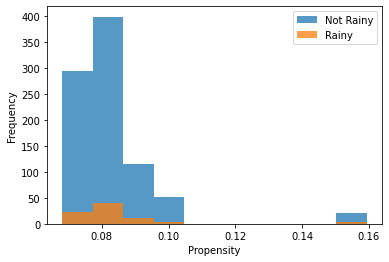

In [ ]:
final_q1df.groupby('rainy')['propensity'].plot(kind='hist',sharex=True,bins=10, alpha=0.75)
legend(['Not Rainy', 'Rainy'])
xlabel('Propensity')

In [ ]:
q1df[~q1df.index.isin(final_q1df.index)]

,hr,rainy,dteday,registered,season,mnth,propensity
